<center>
<img src="images/ods_stickers.jpg" />
    
## Introducción al Machine Learning 2020

Basado en material de  [Yury Kashnitsky](https://yorko.github.io). Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/) y modificado por Jose Robledo. Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.

# <center> Topico 1. Análisis exploratorio con Pandas

<img src="images/pandas.jpg"  width=50% />

### Indice de temas
1. [Demonstración de los principales métodos de Pandas](#1.-Demonstración-de-los-principales-métodos-de-Pandas)
2. [Primer intento de predecir un cambio de empresa de comunicaciones](#2.-Primer-intento-de-predecir-un-cambio-de-empresa-de-comunicaciones)
3. [Ejercicio práctico](#3.-Ejercicio-práctico)
4. [Recursos útiles](#4.-Recursos-útiles)

## 0. Recursos útiles


* [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas cheatsheet PDF](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
* GitHub repos: [Pandas exercises](https://github.com/guipsamora/pandas_exercises/) and ["Effective Pandas"](https://github.com/TomAugspurger/effective-pandas)
* [scipy-lectures.org](http://www.scipy-lectures.org/index.html) — tutorials on pandas, numpy, matplotlib and scikit-learn

## 1. Demostración de los principales métodos de Pandas
Hay muchos tutoriales de como trabajar con el paquete Pandas, que permite una manipulación de datos parecida a la de R y Excel. 

**[Pandas](http://pandas.pydata.org)** es una librería de Python que provee una gran cantidad de medios para realizar análisis de datos. Científicos de datos a menudo trabajan con datos guardados en formatos tipo tablas como `.csv`, `.tsv`, o `.xlsx`. Pandas  permite en forma conveniente la carga , procesamiento y el análisis de esos datos tabulados . Junto con  `Matplotlib` y `Seaborn`, `Pandas`  provee un rango amplio de oportunidades para analizar visualmente datos tabulados.

Las principales estructuras de datos  en `Pandas` estan implementadas con las clases **Series** y **DataFrame**. La primera es una matriz uni-dimensional indexada de un tipo de datos fijo. La segunda es una estructura de datos bidimensional - una tabla - donde cada columna contiene datos del mismo tipo. Se puede pensar como un dicionario de instancias de `Series`. Los `DataFrames` son muy buenos para representar datos reales: filas corresponden a instancias  (ejemplos, observaciones, etc.),  y las columnas corresponden a características de esas instancias. 

En python es necesario cargar las librerias antes de operar con ellas, con el comando `import`

In [1]:
import numpy as np
import pandas as pd
#pd.set_option("display.precision", 2)


Demostraremos los principales métodos de `pandas ` analizando un grupo de [datos](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) de  clientes de un operador de telecomunicaciones. El objetivo es inferir informacion sobre la variable (`churn`), esto es, si el cliente decide cambiar o no de compañía.

Empecemos leyendo los datos (usando la función `read_csv` del paquete pandas)  y miremos  las 5 primeras líneas usando el método `head`:


In [2]:
df = pd.read_csv('datos/telecom_churn.csv')
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


<details>
<summary>Mostrando DataFrames en Jupyter notebooks</summary>
<p>
En Jupyter notebooks, el comando anterior imprime  un  Pandas DataFrames  como una linda tabla mientras que el comando  `print(df.head())` no se formatea bien.
Por defecto, Pandas muestra 20 columnas y 60 filas, por l o cual, si el DataFrame es mayor, se debe usar la opcion  `set_option` para mostrarlo completo como se muestra a continuación:

```python
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
```
</p>
</details>

Recuerde que cada fila corresponde a un cliente , una **instancia**, y que las columnas son  **características** de esa instancia o caso.

Miremos la dimensionalidad de datos, los nombres de las características y los tipos de características.

In [9]:
df.shape

(3333, 20)

De la salida sé que la tabla contiene 3333 filas y 20 columnas.

Ahora imprimamos las columnas con el atributo `columns`:

In [10]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

Podemos usar  `info()` para obtener informacion general sobre el dataframe: 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

`bool`, `int64`, `float64` y `object` son los tipos de datos de las características. Podemos ver que una característica es lógica  (`bool`), 3 características son  `object`,  y 16 características son numéricas. Con este mismo método, se puede ver que no hay valores faltantes porque cada columna tiene 3333 observaciones, el  mismo número de filas que se obtuvo con `shape`.





El método `describe` muestra las características básicas de cada variable numérica  (tipos `int64` y `float64`): el número datos faltantes, media  desviación estandard , rango,media, mediana y los cuartiles 0.25 y 0.75. 

Observen que variables obviamente categóricas, como código de área (`area code`) tiene calculados los estadísticos por no estar definida como `object` sino como `int64`.

In [3]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Para ver los estadísticos de las variables no numéricas, se tiene que dar la orden explícita sobre los tipos de datos de interés en el parámetro `include`.

In [14]:
df.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2850


Para describir la distribución de las variables  categoricas (tipo `object`) y booleanas (tipo `bool`) se puede usar el método `value_counts`. Por ejemplo, miremos la distribución de la variable `Churn`:

In [15]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

Se puede  **cambiar el tipo de columna** con el comando`astype`. Se lo aplicamos a la característica `Churn` para convertirla en  `int64`:



In [18]:
df['Churn'] = df['Churn'].astype('int64')
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

Esto dice que 2850 clientes de 3333 son *leales*; su valor de cambio `Churn` es 0. Para calcular fracciones hay que pasar la palabra clave `normalize=True` a la función `value_counts`.

In [19]:
df['Churn'].value_counts(normalize=True)

0    0.86
1    0.14
Name: Churn, dtype: float64

Observemos que la variable  `churn` permanece como `int64` en el dataframe. 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   


### Orden

Un `DataFrame` puede ser ordenado por el valor de una de las variables en particular. Por ejemplo, podemos ordenar  por  *Total day charge* (usando `ascending=False` para ordenar en forma descendiente):



In [23]:
df.sort_values(by='Total day charge', ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1



### Indexando y recuperando datos

Un `DataFrame`  puede ser indexado de diferentes formas. 

Para obtener una única columna, se puede usar la construcción  `DataFrame['Name']`. Por ejemplo, para obtener la respuesta a la pregunta 

**cuál es la proporción de clientes que  abandonaron la compañía de nuestro dataframe?**



In [6]:
df['Churn'].mean()

0.14491449144914492

Podemos verificar manualmente lo que está haciendo el método mean()

In [25]:
#cuento cuanto hay de cada uno
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [28]:
print(483/(483+2850))
#Otra manera rebuscada de hacer lo mismo 
#(La mayoría de las veces conviene usar lo que ya está hecho para evitar errores)
print(np.sum(df['Churn'])/df['Churn'].shape[0])

0.14491449144914492
0.14491449144914492


14.5% es muy malo para una empresa de telecomunicaciones; esa tasa de abandono puede producir la bancarrota de la empresa. 


<details>
**Boolean indexing**
<p> Indexar con sentencias lógicas sobre una columna es muy conveniente. La sintaxis es `df[P(df['Name'])]`, donde `P` es una condición lógica  que se chequea para cada elemento de la columna `Name`. El resultado de tal indice es el  `DataFrame` que consiste en solo las filas que satisfacen la condición `P` en la columna `Name`. 
</p>
</details>

Usamos esto para contestar las siguientes preguntas

**Cuales son los valores promedio de las variables para los clientes que abandonan la compañía?**


In [29]:
df[df['Churn'] == 1].mean(numeric_only=True)

Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

**Cuanto tiempo (en media) pasan en el teléfono durante el día los clientes que abandonan la compañía?**

In [17]:
# Dos maneras de hacerlo:

#Eligiendo primero todas las columnas de los que abandonan y luego seleccionando la columna deseada para promediar
print(df[df['Churn'] == 1]['Total day minutes'].mean())

#Eligiendo sólo los que abandonan de la columna deseada y luego promediar
print(df.loc[df['Churn'] == 1,'Total day minutes'].mean())

206.91407867494823
206.91407867494823



**Cuál es el máximo  de minutos en llamadas internacionales dentro de los usuarios leales a la compañía (`Churn == 0`) que no tienen un plan internacional?**



Los operadores lógicos a utilizar en pandas son 

- & : and
- | : or
- == : equal
- != : not equal
- \> : larger than
- < : lower than
- \>= : larger or equal than
- <= : lower or equal than

Se deben incluir paréntesis en la sintáxis cuando hay dos condiciones lógicas conjuntas:

Ejemplo:

df\[(condición1) & (condición2)\]

In [18]:
#Dos posibles alternativas
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl minutes'].max()
df.loc[(df['Churn'] == 0) & (df['International plan'] == 'No'),'Total intl minutes'].max()

18.9


DataFrames pueden ser indexados por etiqueta (label) o nombre de fila (index) or por el número de fila que le corresponda. El método  `loc` se usa parar **indexar por nombre**, mientras que  `iloc()` se usa para **indexar por número**.

Seleccionemos  *"los valores de las filas con index entre 0 y 5 (inclusive) y columnas desde State hasta Area code (inclusive)"*. 


In [19]:
df.loc[0:5, 'State':'Area code']

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


Ahora seleccionemos  *"los valores de las primeras cinco filas de las primeras tres columnas"* (como en una tajada de python normal, el máximo valor no está incluido ).

In [20]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


Si necesitamos la primera o la última linea del dataframe, podemos usar `df[:1]` or `df[-1:]`:

In [21]:
df[-1:] #La última

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0



### Aplicando funciones por columna o fila

**Para aplicar funciones a cada columna usar `apply()`:**


In [22]:
df.apply(np.max) 

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

El método `apply`puede ser usado para aplicar una función a cada fila.  
Para hacer esto, especificar `axis=1`.

Funciones lambda son convenientes en esos escenarios. Por ejemplo, si necesitamos seleccionar todos los estados que comienzan con la letra 'W', podemos hacerlo así:

In [23]:
df[df['State'].apply(lambda state: state[0] == 'W')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


Aqui podemos ver lo que es una lambda function 

https://www.educative.io/edpresso/what-is-a-python-lambda-function?affiliate_id=5082902844932096&utm_source=google&utm_medium=cpc&utm_campaign=platform2&utm_content=ad-1-dynamic&gclid=EAIaIQobChMI1bqxpPTL5AIViYORCh2EcA-QEAAYASAAEgKEEfD_BwE


También podemos definir funciones de antemano

In [24]:
#así se define una función. Recordar que en python importa la indentación
#Las palabras propias del lenguaje aparecen siempre en verde, como def o return (no se pueden modificar)
#El nombre de la función aparece en azul y puede modificarse. Entre paréntesis se deben incluir la o las variables.
# El dos puntos ":" es obligatorio en la sintáxis. Python interpreta que luego de eso debe venir una indentación,
# y todo lo que está en ese nivel de indentación va a pertenecer a la función, hasta salir de la misma.
def PrimeraLetraW(variable):
    return variable[0] == 'W'

#Esto ya no está en la función
df[df['State'].apply(PrimeraLetraW)].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


El método `map` puede ser usado para **reemplazar valores en una columna** pasando un diccionario de la forma  `{old_value: new_value}` como argumento:

In [25]:
d = {'No' : False, 'Yes' : True}
df['International plan'] = df['International plan'].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Lo mismo puede hacerse con el método `replace`:

In [26]:
df = df.replace({'Voice mail plan': d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0



### Agrupamiento

En  general, agrupar datos en Pandas funciona como sigue:



```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```


1. Primero, el método `groupby` divide las `grouping_columns` por sus valores. Estos devienen los nuevos índices del dataframe generado. 
2. Luego se seleccionan las columnas de interés  (`columns_to_show`). Si `columns_to_show` no esta incluido, todas las columnas serán incluidas.
3. Finalmente, uno  o mas funciones se aplican a los grupos obtenidos seleccionando columnas.

Por ejemplo, encontremos los estadísticos descriptivos de tres variables  dentro de las categorías de la variable `Churn` :

In [27]:
columns_to_show = ['Total day minutes', 
                   'Total eve minutes', 
                   'Total night minutes']

df.groupby(['Churn'])[columns_to_show].describe(percentiles=[0.1])

Total day minutes                                            \
                  count    mean    std  min     10%    50%    max   
Churn                                                               
0                2850.0  175.18  50.18  0.0  109.49  177.2  315.6   
1                 483.0  206.91  69.00  0.0  115.96  217.6  350.8   

      Total eve minutes                 ...                        \
                  count    mean    std  ...     10%    50%    max   
Churn                                   ...                         
0                2850.0  199.04  50.29  ...  136.09  199.6  361.8   
1                 483.0  212.41  51.73  ...  144.36  211.3  363.7   

      Total night minutes                                              
                    count    mean    std   min     10%     50%    max  
Churn                                                                  
0                  2850.0  200.13  51.11  23.2  134.99  200.25  395.0  
1                   483.0  205.23  47.13  47.4  146.86  204.80  354.9  

[2 rows x 21 columns]

Podemos hacer lo mismo pasando una lista de funciones usando `agg()`:

In [28]:
columns_to_show = ['Total day minutes', 
                   'Total eve minutes', 
                   'Total night minutes']

df.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                    Total eve minutes               \
                   mean    std amin   amax              mean    std  amin   
Churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
        amax                mean    std  amin   amax  
Churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9


### Tablas de resumen

Suponga que queremos ver como se distribuyen las observaciones de nuestro dataframe  en el contexto de dos variables  the context of two variables - `Churn` y `International plan`. Para hacerlo armamos una **tabla de contingencia** usindo el método `crosstab`:



In [29]:

pd.crosstab(df['Churn'], df['International plan'], normalize=True)

International plan,False,True
Churn,,
0,0.8,0.06
1,0.1,0.04


In [30]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)

Voice mail plan,False,True
Churn,,
0,0.60,0.25
1,0.12,0.02


Podemos ver que la mayoría de los usuarios leales no usan servicios adicionales (International Plan/Voice mail).

Esto se asemeja a las  **pivot tables** de Excel. Para implementar esas tablas se usa el método `pivot_table` con los parámetros :

* `values` – la lista de variables a la que se le calcularan los estadisticos,
* `index` – la lista de variables con la cual se agruparan los datos,
* `aggfunc` – que estadisticos se necesitan calcular para los grupos, sum, mean, maximum, minimum o algo similar.



Como ejemplo miremos el promedio de las llamadas de día tarde y noche por código de area.

In [31]:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'],
               ['Area code'], aggfunc='mean')

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60



###  Transformaciones de DataFrame

Como muchas otras operaciones de datos en Pandas, agregar columna a un DataFrame puede hacerce de varias formas. 

Por ejemplo, si se quiere calcular el numero de llamadas por usuario podemos crear la serie `total_calls` y pegarla en el final del DataFrame:



In [32]:
total_calls = df['Total day calls'] + df['Total eve calls'] + \
              df['Total night calls'] + df['Total intl calls']
df.insert(loc=len(df.columns), column='Total calls', value=total_calls) 
# parametro loc es el numero de de columnas antes de insertar el nuevo objeto Series
# para que se inserte al final del dataset  se fija en len(df.columns) 
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


Es  posible agregar una columna mas fácilmente sin crear una Series intermedia:

In [33]:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + \
                     df['Total night charge'] + df['Total intl charge']
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


Para borrar columnas o filas se usa el método `drop`, pasando los  índices requeridos y el parámetro `axis`  (`1` si se borra una columna o nada o `0` si se borra una fila). El argumento `inplace` dice cuando el se cambia el  DataFrame original. Con  `inplace=False`, el método `drop` no cambia el DataFrame existente y devuelve uno nuevo con las columnas o filas borradas. Con  `inplace=True`, altera el DataFrame.

In [34]:
# get rid of just created columns
df.drop(['Total charge', 'Total calls'], axis=1, inplace=True) 
# and here’s how you can delete rows
df.drop([1, 2]).head() 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


## 2. Primer intento de predecir un cambio de empresa de comunicaciones


Veamos como la variable cambio de compañia *Churn* esta relacionada con la variable  *International plan* . Lo hacemos usando la tabla de contingencia  `crosstab` y usando análisis visual con `Seaborn`.


In [35]:
pd.crosstab(df['Churn'], df['International plan'], margins=True,normalize=True)

International plan,False,True,All
Churn,,,
0,0.8,0.06,0.86
1,0.1,0.04,0.14
All,0.9,0.10,1.00


In [36]:
# some imports to set up plotting 
import matplotlib.pyplot as plt
# !pip install seaborn 
import seaborn as sns
# import some nice vis settings 
sns.set()
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

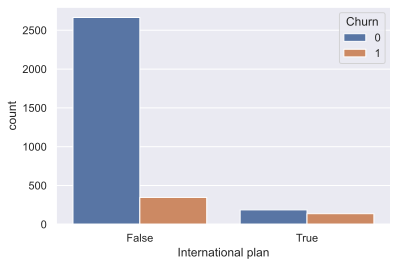

In [37]:
sns.countplot(x='International plan', hue='Churn', data=df);


Vemos que entre los clientes con *International Plan*, la tasa de cambio es mayor, lo cual es una observacion interesante! Esto se ve aun mas con la tabla condicional a tener plan internacional. 

In [38]:
pd.crosstab(df['Churn'], df['International plan'], margins=True,normalize='columns')

International plan,False,True,All
Churn,,,
0,0.89,0.58,0.86
1,0.11,0.42,0.14


Quizas los costos son demasiado grandes si se utiliza el servicio a menudo, o la calidad de las comunicaciones no es la adecuada en relacion al costo, y esto eleva el disgusto de los clientes de la compañía. 

Observemos otra variable  – *Customer service calls*, con  una tabla y un gráfico de conteo. 

In [39]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


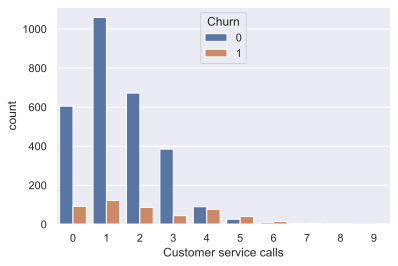

In [40]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

En ell gráfico se vé mejor que el número de clientes que cambia aumenta abruptamente a partir de las cuatro llamadas o mas al servicio al cliente.  

Agreguemos otra variable binaria al DataFrame – `Customer service calls > 3`. Y una vez mas veamos como influye o se relaciona con la variable churn. 

In [41]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')

pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True,normalize=True)

Churn,0,1,All
Many_service_calls,,,
0,0.82,0.10,0.92
1,0.04,0.04,0.08
All,0.86,0.14,1.00


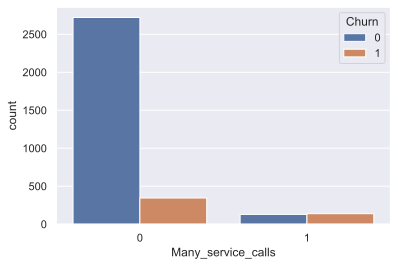

In [42]:
sns.countplot(x='Many_service_calls', hue='Churn', data=df);


Creamos ahora otra tabla de contingencia para relacionar las varibles  *Churn* con *International plan* y la variable creada  *Many_service_calls*.



In [43]:
pd.crosstab( df['Churn'],[df['Many_service_calls'] , df['International plan']])#, rownames=['a'], colnames=['b', 'c'])

Many_service_calls     0          1     
International plan False True False True
Churn                                   
0                   2544  177   120    9
1                    227  118   119   19

Por lo cual, si predecimos que el cliente no es leal (Churn=1) en el caso que el numero de llamadas al servicio de atención al consumidor es  mayor a 3 y  tiene el  International Plan ( y predecimos Churn=0 en otro caso), esta regla  tiene un error de (227+ 118	+ 119 +9)  casos de 3333 casos, esto es 14.2%. Esta regla tiene una exactitud del 85.8%, y se llego a ella con un razonamiento muy simple.

In [44]:
pd.crosstab( df['Churn'],df['Many_service_calls'] & df['International plan'])

col_0,False,True
Churn,,
0,2841,9
1,464,19
